# 1. Project Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import mode

C:\Users\Reliance Digital\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [104]:
%matplotlib inline


In [2]:
# Set display options to show all columns/rows and suppress scientific notation for floats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [3]:
# Assuming the file is named 'Insurance Data.xlsx' in the current working directory
try:
    data = pd.read_excel(r"C:\Python Project Naresh it\Insurance_Data_50k.xlsx")
except FileNotFoundError:
    print("Error: Insurance Data.xlsx not found. Please ensure the file is in the correct directory.")

In [4]:
data.head()

,Age,Gender,Marital Status,Family Members,Education,Occupation,Job Title,Income,Current Product,Current Product Type,Current_Coverage,New Product Type,New_Coverage,Rating,Converted,Status
0,30.00,F,Divorced,2.00,LHS,SPT,PG,1.95,No,NO,-20709.00,INV,2155940.00,Cold,Converted,Converted
1,48.00,M,Divorced,3.00,LHS,SFT,OC,6.37,No,NO,-52383.00,TLE,991685.00,Warm,Converted,Converted
2,53.00,M,Married,4.00,NE,SPT,PG,5.82,Yes,NO,4018892.00,ANS,1972325.00,Cold,NotConverted,AS
3,45.00,M,Married,2.00,PD,SFT,RR,1.23,No,ANS,34644.00,ANS,3932434.00,Warm,NotConverted,Converted
4,37.00,M,Married,3.00,BD,SPT,BA,1.17,No,NO,27473.00,TLE,1984786.00,Hot,NotConverted,Converted


In [5]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Family Members', 'Education',
       'Occupation', 'Job Title', 'Income', 'Current Product',
       'Current Product Type', 'Current_Coverage', 'New Product Type',
       'New_Coverage', 'Rating', 'Converted', 'Status'],
      dtype='object')

## Initial Data Prep

In [6]:
[re.sub(r'[\s/]+', '_', x.strip()) for x in data.columns]

['Age',
 'Gender',
 'Marital_Status',
 'Family_Members',
 'Education',
 'Occupation',
 'Job_Title',
 'Income',
 'Current_Product',
 'Current_Product_Type',
 'Current_Coverage',
 'New_Product_Type',
 'New_Coverage',
 'Rating',
 'Converted',
 'Status']

In [7]:
# Clean column names (replace spaces with underscores)
data.columns = [re.sub(r'[\s/]+', '_', x.strip()) for x in data.columns]

# Display initial shape and first few rows
print(f"Initial Shape: {data.shape}")
print("First 5 rows of the dataset:")
data.head()

Initial Shape: (50000, 16)
First 5 rows of the dataset:


,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
0,30.00,F,Divorced,2.00,LHS,SPT,PG,1.95,No,NO,-20709.00,INV,2155940.00,Cold,Converted,Converted
1,48.00,M,Divorced,3.00,LHS,SFT,OC,6.37,No,NO,-52383.00,TLE,991685.00,Warm,Converted,Converted
2,53.00,M,Married,4.00,NE,SPT,PG,5.82,Yes,NO,4018892.00,ANS,1972325.00,Cold,NotConverted,AS
3,45.00,M,Married,2.00,PD,SFT,RR,1.23,No,ANS,34644.00,ANS,3932434.00,Warm,NotConverted,Converted
4,37.00,M,Married,3.00,BD,SPT,BA,1.17,No,NO,27473.00,TLE,1984786.00,Hot,NotConverted,Converted


# 2. Data Understanding and Missing Values

In [8]:
for col in data.columns:
    print("The unique values in each column", col)
    print(data[col].unique())

The unique values in each column Age
[30. 48. 53. 45. 37. 47. 58. 49. 40. 43. 33. 25. 20. 31. 59. 50. 27. 23.
 26. 56. 28. 35. 51. 22. 24. 39. 36. 38. 34. 42. 21. 54. 55. 32. 41. 18.
 57. 46. 52. 29. 60. 44. 19. nan]
The unique values in each column Gender
['F' 'M' nan]
The unique values in each column Marital_Status
['Divorced' 'Married' 'Single' nan]
The unique values in each column Family_Members
[ 2.  3.  4.  5.  7.  6.  9. 10.  8.  1. nan]
The unique values in each column Education
['LHS' 'NE' 'PD' 'BD' 'MD' 'UHS' nan]
The unique values in each column Occupation
['SPT' 'SFT' 'SE' nan]
The unique values in each column Job_Title
['PG' 'OC' 'RR' 'BA' 'FH' 'CB' 'PA' 'PR' 'OT' 'DD' 'CF' 'OM' nan]
The unique values in each column Income
[1.94818057 6.37291823 5.82038691 ... 2.5993835  5.04113262 1.53097298]
The unique values in each column Current_Product
['No' 'Yes' nan]
The unique values in each column Current_Product_Type
['NO' 'ANS' 'INV' 'PMT' 'END' 'TLE' nan]
The unique values in 

In [9]:
print("Missing values before cleaning:")
print(data.isnull().sum())

Missing values before cleaning:
Age                     22
Gender                  91
Marital_Status          21
Family_Members          11
Education               23
Occupation              22
Job_Title               62
Income                  49
Current_Product          9
Current_Product_Type    16
Current_Coverage        24
New_Product_Type        24
New_Coverage            64
Rating                  22
Converted               24
Status                   0
dtype: int64


# 3. Data Cleaning and Preprocessing

In [10]:
age_mean = data['Age'].mean()
age_median = data['Age'].median()
print(age_mean, age_median)

38.97957101124495 39.0


In [11]:
replacement = age_mean if age_mean < age_median else age_median
print(replacement)

38.97957101124495


In [12]:
data['Age'].fillna(replacement, inplace=True)
print(f"Age missing values filled with mean: {age_mean}")

Age missing values filled with mean: 38.97957101124495


In [13]:
data['Age'].isnull().sum()

0

### Family_Members

In [14]:
fm_mean = data['Family_Members'].mean()
fm_median = data['Family_Members'].median()
print(fm_mean, fm_median)
replacement = fm_mean if fm_mean < fm_median else fm_median
replacement

4.658804937086159 4.0


4.0

In [15]:
print("The value used fo replacement", replacement)
data['Family_Members'].fillna(replacement, inplace=True)

print(f"Family_Members missing values filled with median: {replacement}")

The value used fo replacement 4.0
Family_Members missing values filled with median: 4.0


### Education, Occupation, Job_Title, New_Product_Type, Rating: Replace with Mode

In [16]:
categorical_cols = ['Education', 'Occupation', 'Job_Title', 'New_Product_Type', 'Rating']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
    print(f"Variable {col} missing values filled with mode: {data[col].mode()[0]}")

Variable Education missing values filled with mode: BD
Variable Occupation missing values filled with mode: SPT
Variable Job_Title missing values filled with mode: FH
Variable New_Product_Type missing values filled with mode: ANS
Variable Rating missing values filled with mode: Cold


## Handling Income Missing Values (Grouped Mean/Median)

In [17]:
# Get mean and median grouped by Occupation
income_mean = data.groupby('Occupation')['Income'].mean()
income_median = data.groupby('Occupation')['Income'].median()

In [18]:
income_mean

Occupation
SE    4.94
SFT   4.92
SPT   4.99
Name: Income, dtype: float64

In [19]:
income_median

Occupation
SE    3.02
SFT   3.01
SPT   3.06
Name: Income, dtype: float64

In [20]:
# Apply imputation logic
for occ, mean in income_mean.items():
    median = income_median[occ]

    # Choose the smaller of mean or median
    imputation_value = min(mean, median)

    # Find rows where Occupation matches and Income is missing
    mask = (data['Occupation'] == occ) & (data['Income'].isna())

    # Fill missing values
    data.loc[mask, 'Income'] = imputation_value

    print(f"Occupation: {occ}, Mean: {mean:.2f}, Median: {median:.2f}, Imputed with: {imputation_value:.2f}")

print(f"\nIncome missing values left: {data['Income'].isna().sum()}")

Occupation: SE, Mean: 4.94, Median: 3.02, Imputed with: 3.02
Occupation: SFT, Mean: 4.92, Median: 3.01, Imputed with: 3.01
Occupation: SPT, Mean: 4.99, Median: 3.06, Imputed with: 3.06

Income missing values left: 0


In [21]:
data['Income'].isnull().sum()

0

In [22]:
data.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
0,30.00,F,Divorced,2.00,LHS,SPT,PG,1.95,No,NO,-20709.00,INV,2155940.00,Cold,Converted,Converted
1,48.00,M,Divorced,3.00,LHS,SFT,OC,6.37,No,NO,-52383.00,TLE,991685.00,Warm,Converted,Converted
2,53.00,M,Married,4.00,NE,SPT,PG,5.82,Yes,NO,4018892.00,ANS,1972325.00,Cold,NotConverted,AS
3,45.00,M,Married,2.00,PD,SFT,RR,1.23,No,ANS,34644.00,ANS,3932434.00,Warm,NotConverted,Converted
4,37.00,M,Married,3.00,BD,SPT,BA,1.17,No,NO,27473.00,TLE,1984786.00,Hot,NotConverted,Converted


## Handling Interdependent Missing Values (Current Product, Type, Coverage)

#### Step 1: Impute Current_Product

In [23]:
c1 = data['Current_Product'].isna()
data[c1]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3057,34.00,M,Married,2.00,BD,SPT,CB,9.27,NaN,NO,46806.00,ANS,2933667.00,Warm,Converted,Converted
4687,42.00,F,Married,2.00,MD,SPT,FH,9.35,NaN,NO,68337.00,ANS,2996273.00,Cold,Converted,Converted
6151,28.00,F,Married,7.00,UHS,SPT,FH,4.80,NaN,NO,984326.00,ANS,2967208.00,Hot,Converted,NW
18058,44.00,M,Married,9.00,BD,SE,OT,2.03,NaN,PMT,106040.00,ANS,15028047.00,Cold,NotConverted,QG
20282,34.00,F,Married,10.00,PD,SPT,FH,9.29,NaN,END,60401.00,END,4989096.00,Cold,NotConverted,AS
22396,56.00,F,Married,7.00,LHS,SPT,PG,3.53,NaN,PMT,-30483.00,ANS,2032073.00,Cold,NotConverted,PW
23094,39.00,F,Divorced,1.00,LHS,SE,PR,7.92,NaN,NO,3017127.00,INV,1057781.00,Hot,NotConverted,Converted
44320,22.00,M,Married,4.00,NE,SPT,FH,1.94,NaN,TLE,2936075.00,ANS,4081902.00,Cold,Converted,PN
46676,28.00,F,Divorced,4.00,BD,SPT,DD,6.53,NaN,ANS,-12088.00,ANS,1985458.00,Warm,NotConverted,QG


In [24]:
data[c1].index

Index([3057, 4687, 6151, 18058, 20282, 22396, 23094, 44320, 46676], dtype='int64')

In [25]:
# Identify rows where Current_Product is missing (NaN)
missing_prod_idx = data[data['Current_Product'].isna()].index
missing_prod_idx

Index([3057, 4687, 6151, 18058, 20282, 22396, 23094, 44320, 46676], dtype='int64')

In [26]:
subset_data = data.loc[missing_prod_idx]
subset_data

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3057,34.00,M,Married,2.00,BD,SPT,CB,9.27,NaN,NO,46806.00,ANS,2933667.00,Warm,Converted,Converted
4687,42.00,F,Married,2.00,MD,SPT,FH,9.35,NaN,NO,68337.00,ANS,2996273.00,Cold,Converted,Converted
6151,28.00,F,Married,7.00,UHS,SPT,FH,4.80,NaN,NO,984326.00,ANS,2967208.00,Hot,Converted,NW
18058,44.00,M,Married,9.00,BD,SE,OT,2.03,NaN,PMT,106040.00,ANS,15028047.00,Cold,NotConverted,QG
20282,34.00,F,Married,10.00,PD,SPT,FH,9.29,NaN,END,60401.00,END,4989096.00,Cold,NotConverted,AS
22396,56.00,F,Married,7.00,LHS,SPT,PG,3.53,NaN,PMT,-30483.00,ANS,2032073.00,Cold,NotConverted,PW
23094,39.00,F,Divorced,1.00,LHS,SE,PR,7.92,NaN,NO,3017127.00,INV,1057781.00,Hot,NotConverted,Converted
44320,22.00,M,Married,4.00,NE,SPT,FH,1.94,NaN,TLE,2936075.00,ANS,4081902.00,Cold,Converted,PN
46676,28.00,F,Divorced,4.00,BD,SPT,DD,6.53,NaN,ANS,-12088.00,ANS,1985458.00,Warm,NotConverted,QG


In [27]:
is_product_type_no = (subset_data['Current_Product_Type'] == 'NO')
is_coverage_zero = (subset_data['Current_Coverage'] == 0.0)

In [28]:
subset_data[is_product_type_no| is_coverage_zero]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3057,34.00,M,Married,2.00,BD,SPT,CB,9.27,NaN,NO,46806.00,ANS,2933667.00,Warm,Converted,Converted
4687,42.00,F,Married,2.00,MD,SPT,FH,9.35,NaN,NO,68337.00,ANS,2996273.00,Cold,Converted,Converted
6151,28.00,F,Married,7.00,UHS,SPT,FH,4.80,NaN,NO,984326.00,ANS,2967208.00,Hot,Converted,NW
23094,39.00,F,Divorced,1.00,LHS,SE,PR,7.92,NaN,NO,3017127.00,INV,1057781.00,Hot,NotConverted,Converted


In [29]:
subset_data[is_product_type_no| is_coverage_zero].index

Index([3057, 4687, 6151, 23094], dtype='int64')

In [30]:
indices_to_fix = subset_data[is_product_type_no| is_coverage_zero].index

data.loc[indices_to_fix, 'Current_Product'] = 'No'

In [31]:
# cross check 
data['Current_Product'].isnull().sum()

5

In [32]:
# --- Scenario 2: Existing customer (Yes) ---
# If CP is still missing after above step -> Yes (implying non-NA type and non-zero coverage, even if those are NaN)
data['Current_Product'].fillna('Yes', inplace=True)

print(f"Current_Product missing values handled. New counts: \n{data['Current_Product'].value_counts()}")

Current_Product missing values handled. New counts: 
Current_Product
Yes    28442
No     21558
Name: count, dtype: int64


In [33]:
data['Current_Product'].isnull().sum()

0

#### Step 2: Impute Current_Product_Type
*   **Strategy (from report):** If `Current_Product` is 'No' or `Current_Coverage` is 0, then `Current_Product_Type` is 'NA' (using 'NO' as per the data). Otherwise, fill with Mode ('ANS').


In [34]:
product_type_col = 'Current_Product_Type'

In [35]:
data[data[product_type_col].isna()]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
542,57.00,F,Single,4.00,BD,SE,PG,9.48,Yes,NaN,15088033.00,ANS,15001049.00,Warm,Converted,ARS
605,26.00,F,Married,9.00,PD,SPT,FH,1.60,Yes,NaN,1984585.00,ANS,14899846.00,Cold,Converted,NW
1977,18.00,F,Single,5.00,NE,SE,FH,1.49,Yes,NaN,46075.00,TLE,4086659.00,Warm,NotConverted,NW
2037,37.00,F,Single,10.00,MD,SE,OM,1.15,Yes,NaN,-59423.00,INV,14989910.00,Hot,NotConverted,Converted
3051,24.00,F,Married,10.00,BD,SE,OT,10.02,Yes,NaN,3052414.00,TLE,2973748.00,Hot,NotConverted,Converted
6986,30.00,M,Married,2.00,LHS,SE,PG,9.44,Yes,NaN,14987708.00,TLE,1018979.00,Warm,NotConverted,AS
8947,21.00,F,Single,2.00,BD,SE,FH,9.89,No,NaN,-27264.00,ANS,3984153.00,Cold,NotConverted,Converted
9268,49.00,M,Divorced,1.00,MD,SPT,DD,1.07,No,NaN,929132.00,TLE,973267.00,Hot,Converted,AS
11706,48.00,F,Married,7.00,MD,SE,FH,4.31,Yes,NaN,15011187.00,ANS,14981939.00,Cold,Converted,Converted
15549,32.00,F,Divorced,3.00,NE,SE,PG,7.21,No,NaN,-2248.00,ANS,1976874.00,Hot,Converted,PW


In [36]:
product_type_col = 'Current_Product_Type'
nmissing_cpt_idx = data[data[product_type_col].isna()].index

In [37]:
nmissing_cpt_idx


Index([  542,   605,  1977,  2037,  3051,  6986,  8947,  9268, 11706, 15549,
       16402, 20439, 26622, 34146, 36138, 44087],
      dtype='int64')

In [38]:
subset_for_check = data.loc[nmissing_cpt_idx]

is_status_no = (subset_for_check['Current_Product'] == 'No')
is_coverage_zero = (subset_for_check['Current_Coverage'] == 0.0)

In [39]:
subset_for_check[is_status_no | is_coverage_zero]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
8947,21.00,F,Single,2.00,BD,SE,FH,9.89,No,NaN,-27264.00,ANS,3984153.00,Cold,NotConverted,Converted
9268,49.00,M,Divorced,1.00,MD,SPT,DD,1.07,No,NaN,929132.00,TLE,973267.00,Hot,Converted,AS
15549,32.00,F,Divorced,3.00,NE,SE,PG,7.21,No,NaN,-2248.00,ANS,1976874.00,Hot,Converted,PW
16402,23.00,M,Divorced,1.00,LHS,SPT,PG,2.97,No,NaN,999603.00,END,15068381.00,Cold,NotConverted,PS
26622,34.00,M,Single,5.00,BD,SPT,FH,7.21,No,NaN,15002045.00,END,1074398.00,Hot,NotConverted,PP
34146,51.00,F,Married,1.00,LHS,SPT,PG,2.00,No,NaN,-70360.00,ANS,1006880.00,Warm,Converted,Converted


In [40]:
indices_to_impute = subset_for_check[is_status_no | is_coverage_zero].index
indices_to_impute

Index([8947, 9268, 15549, 16402, 26622, 34146], dtype='int64')

In [41]:
indices_to_impute = subset_for_check[is_status_no | is_coverage_zero].index

data.loc[indices_to_impute, product_type_col] = 'NO'

In [42]:
# Cross ccheck
data['Current_Product_Type'].isnull().sum()

10

In [43]:
data[data[product_type_col].isna()]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
542,57.00,F,Single,4.00,BD,SE,PG,9.48,Yes,NaN,15088033.00,ANS,15001049.00,Warm,Converted,ARS
605,26.00,F,Married,9.00,PD,SPT,FH,1.60,Yes,NaN,1984585.00,ANS,14899846.00,Cold,Converted,NW
1977,18.00,F,Single,5.00,NE,SE,FH,1.49,Yes,NaN,46075.00,TLE,4086659.00,Warm,NotConverted,NW
2037,37.00,F,Single,10.00,MD,SE,OM,1.15,Yes,NaN,-59423.00,INV,14989910.00,Hot,NotConverted,Converted
3051,24.00,F,Married,10.00,BD,SE,OT,10.02,Yes,NaN,3052414.00,TLE,2973748.00,Hot,NotConverted,Converted
6986,30.00,M,Married,2.00,LHS,SE,PG,9.44,Yes,NaN,14987708.00,TLE,1018979.00,Warm,NotConverted,AS
11706,48.00,F,Married,7.00,MD,SE,FH,4.31,Yes,NaN,15011187.00,ANS,14981939.00,Cold,Converted,Converted
20439,41.00,M,Divorced,2.00,LHS,SE,PG,2.01,Yes,NaN,25045.00,INV,1038962.00,Cold,NotConverted,Converted
36138,44.00,F,Single,2.00,UHS,SE,FH,5.87,Yes,NaN,15050706.00,ANS,1022276.00,Hot,NotConverted,Converted
44087,21.00,F,Married,1.00,BD,SFT,DD,2.25,Yes,NaN,2037604.00,PMT,4061090.00,Cold,NotConverted,PW


In [44]:
# --- Scenario 2: Existing customer -> Mode ---
# If CPT is still missing, fill with the mode of the *non-NO* types ('ANS' in the example)
remaining_missing_idx = data[data[product_type_col].isna()].index
remaining_missing_idx

Index([542, 605, 1977, 2037, 3051, 6986, 11706, 20439, 36138, 44087], dtype='int64')

In [45]:
data.loc[remaining_missing_idx]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
542,57.00,F,Single,4.00,BD,SE,PG,9.48,Yes,NaN,15088033.00,ANS,15001049.00,Warm,Converted,ARS
605,26.00,F,Married,9.00,PD,SPT,FH,1.60,Yes,NaN,1984585.00,ANS,14899846.00,Cold,Converted,NW
1977,18.00,F,Single,5.00,NE,SE,FH,1.49,Yes,NaN,46075.00,TLE,4086659.00,Warm,NotConverted,NW
2037,37.00,F,Single,10.00,MD,SE,OM,1.15,Yes,NaN,-59423.00,INV,14989910.00,Hot,NotConverted,Converted
3051,24.00,F,Married,10.00,BD,SE,OT,10.02,Yes,NaN,3052414.00,TLE,2973748.00,Hot,NotConverted,Converted
6986,30.00,M,Married,2.00,LHS,SE,PG,9.44,Yes,NaN,14987708.00,TLE,1018979.00,Warm,NotConverted,AS
11706,48.00,F,Married,7.00,MD,SE,FH,4.31,Yes,NaN,15011187.00,ANS,14981939.00,Cold,Converted,Converted
20439,41.00,M,Divorced,2.00,LHS,SE,PG,2.01,Yes,NaN,25045.00,INV,1038962.00,Cold,NotConverted,Converted
36138,44.00,F,Single,2.00,UHS,SE,FH,5.87,Yes,NaN,15050706.00,ANS,1022276.00,Hot,NotConverted,Converted
44087,21.00,F,Married,1.00,BD,SFT,DD,2.25,Yes,NaN,2037604.00,PMT,4061090.00,Cold,NotConverted,PW


In [46]:
data['Current_Product_Type'].mode()[0] # from this we could see most of the customers are new customers 

'NO'

To get the proper mode value we need to eliminate the new customers from the data

As we know, where the cusrrent product type is 'NO', which means they are new customers

In [47]:
c1 = data['Current_Product_Type'] != 'NO'

data[c1].head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3,45.00,M,Married,2.00,PD,SFT,RR,1.23,No,ANS,34644.00,ANS,3932434.00,Warm,NotConverted,Converted
6,58.00,F,Married,2.00,LHS,SE,RR,8.98,Yes,INV,19557.00,END,985299.00,Hot,NotConverted,PS
7,49.00,F,Divorced,7.00,LHS,SE,PG,9.53,No,PMT,59030.00,END,1022635.00,Cold,NotConverted,Converted
8,40.00,F,Married,6.00,PD,SPT,FH,1.47,Yes,ANS,15004736.00,TLE,2946612.00,Hot,Converted,PS
10,33.00,F,Married,5.00,UHS,SE,BA,2.28,Yes,END,2073883.00,ANS,14965529.00,Warm,NotConverted,NW


In [48]:
existing_customers = data[c1]

In [49]:
existing_customers['Current_Product_Type'].mode()

0    ANS
Name: Current_Product_Type, dtype: object

In [50]:
existing_customers['Current_Product_Type'].mode()[0]

'ANS'

In [51]:
data['Current_Product_Type'].fillna(existing_customers['Current_Product_Type'].mode()[0], inplace =  True)

In [52]:
# lets cross chechk the missing values
data['Current_Product_Type'].isnull().sum()

0

#### Step 3: Impute Current_Coverage

*   **Strategy (from report):** If `Current_Product` is 'No' or `Current_Product_Type` is 'NA' (NO), then `Current_Coverage` is 0. Otherwise, calculate Mean/Median for the `Current_Product_Type` and fill with the lowest of the two.


In [53]:
# Identify rows where Current_Coverage is missing (NaN)
missing_coverage_idx = data[data['Current_Coverage'].isna()].index
missing_coverage_idx

Index([  533,   937,  5288, 12729, 12789, 14781, 15757, 17876, 18632, 19063,
       19728, 21488, 21587, 26193, 32712, 32795, 36326, 40787, 40990, 44788,
       45842, 48819, 49595, 49812],
      dtype='int64')

In [54]:
subset_cvg_miss_data = data.loc[missing_coverage_idx]
subset_cvg_miss_data

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
533,58.00,M,Married,7.00,BD,SPT,PR,6.94,No,NO,NaN,TLE,979835.00,Cold,Converted,QG
937,51.00,F,Divorced,8.00,BD,SPT,PG,1.49,No,ANS,NaN,INV,14975006.00,Cold,Converted,PW
5288,55.00,F,Married,9.00,LHS,SE,FH,2.89,Yes,NO,NaN,PMT,1092594.00,Cold,NotConverted,Converted
12729,56.00,M,Single,2.00,UHS,SPT,PR,2.24,No,NO,NaN,ANS,2937499.00,Warm,NotConverted,ARS
12789,33.00,F,Married,5.00,MD,SPT,FH,9.05,Yes,NO,NaN,PMT,1024521.00,Hot,NotConverted,NW
14781,24.00,M,Married,6.00,BD,SE,BA,1.25,No,PMT,NaN,TLE,1949558.00,Cold,NotConverted,PW
15757,56.00,M,Single,3.00,MD,SPT,OM,3.04,Yes,TLE,NaN,END,4084515.00,Warm,NotConverted,Converted
17876,57.00,M,Married,1.00,BD,SE,BA,9.78,No,NO,NaN,END,2077372.00,Warm,Converted,ARS
18632,18.00,F,Married,9.00,BD,SPT,PR,9.30,No,END,NaN,INV,1996759.00,Cold,Converted,PS
19063,45.00,M,Single,1.00,BD,SFT,PG,4.78,Yes,NO,NaN,TLE,14971228.00,Warm,Converted,AS


In [55]:
data['Current_Product_Type'].unique()

array(['NO', 'ANS', 'INV', 'PMT', 'END', 'TLE'], dtype=object)

In [56]:
data['Current_Product'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
is_product_type_no = (subset_cvg_miss_data['Current_Product_Type'] == 'NO')
is_status_no = (subset_cvg_miss_data['Current_Product'] == 'No')

indices_to_fix = subset_cvg_miss_data[is_product_type_no| is_status_no].index
indices_to_fix

Index([  533,   937,  5288, 12729, 12789, 14781, 17876, 18632, 19063, 19728,
       21587, 26193, 32795, 36326, 45842, 49595, 49812],
      dtype='int64')

In [58]:
data.loc[indices_to_fix, 'Current_Coverage'] = 0.0

In [59]:
data['Current_Coverage'].isnull().sum()

7

In [60]:
c1 = data['Current_Coverage'].isnull()
coverage_missing_idx = data[c1].index
# we have collected the row indexes whetre we have the missing values  in 'Current_Coverage'

In [61]:
# now will create a df with only missing values
coverage_missing_df = data.loc[coverage_missing_idx]

In [62]:
coverage_missing_df

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
15757,56.00,M,Single,3.00,MD,SPT,OM,3.04,Yes,TLE,NaN,END,4084515.00,Warm,NotConverted,Converted
21488,41.00,M,Married,4.00,UHS,SPT,BA,2.20,Yes,ANS,NaN,ANS,15089955.00,Warm,NotConverted,Converted
32712,57.00,F,Single,10.00,BD,SPT,DD,1.52,Yes,END,NaN,TLE,1970579.00,Cold,Converted,Converted
40787,20.00,M,Married,4.00,PD,SPT,OM,3.00,Yes,END,NaN,INV,14955300.00,Cold,Converted,DR
40990,29.00,F,Married,5.00,PD,SPT,PG,7.96,Yes,PMT,NaN,INV,3010567.00,Cold,NotConverted,DR
44788,39.00,F,Married,6.00,MD,SE,DD,1.70,Yes,TLE,NaN,ANS,1942554.00,Cold,NotConverted,PP
48819,34.00,M,Divorced,1.00,BD,SPT,FH,9.28,Yes,INV,NaN,ANS,1141129.00,Cold,Converted,Converted


In [63]:
# Now I want to check the where I have current product is 'No' or Current_Product_Type is 'NO'
c1 = (coverage_missing_df['Current_Product'] == 'No')
c2 = (coverage_missing_df['Current_Product_Type'] == 'NO')

coverage_missing_df[c1 | c2]

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status


In [64]:
coverage_missing_df[c1 | c2].index

Index([], dtype='int64')

In [65]:
# Step 3: Impute Current_Coverage
coverage_col = 'Current_Coverage'

# --- Scenario 1: No product -> 0 ---
# If Current_Product is 'No' OR Current_Product_Type is 'NO'
index_zero = data[(data[coverage_col].isna()) & ((data['Current_Product'] == 'No') | (data['Current_Product_Type'] == 'NO'))].index
index_zero

Index([], dtype='int64')

In [66]:
data.loc[index_zero, 'Current_Coverage']

Series([], Name: Current_Coverage, dtype: float64)

In [67]:
# now let check for the number of missing values in 'Current_Coverage'
data['Current_Coverage'].isnull().sum()

7

In [68]:
# step 1:
remaining_missing_idx = data[data[coverage_col].isna()].index
remaining_missing_idx

Index([15757, 21488, 32712, 40787, 40990, 44788, 48819], dtype='int64')

In [69]:
# step 2:
non_no_data = data[data['Current_Product_Type'] != 'NO']
non_no_data.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted,Status
3,45.00,M,Married,2.00,PD,SFT,RR,1.23,No,ANS,34644.00,ANS,3932434.00,Warm,NotConverted,Converted
6,58.00,F,Married,2.00,LHS,SE,RR,8.98,Yes,INV,19557.00,END,985299.00,Hot,NotConverted,PS
7,49.00,F,Divorced,7.00,LHS,SE,PG,9.53,No,PMT,59030.00,END,1022635.00,Cold,NotConverted,Converted
8,40.00,F,Married,6.00,PD,SPT,FH,1.47,Yes,ANS,15004736.00,TLE,2946612.00,Hot,Converted,PS
10,33.00,F,Married,5.00,UHS,SE,BA,2.28,Yes,END,2073883.00,ANS,14965529.00,Warm,NotConverted,NW


In [70]:
# step 3a: we need find the grouped mean, median for 'Current_Coverage' by 'Current_Product_Type'
coverage_mean = non_no_data.groupby('Current_Product_Type')['Current_Coverage'].mean()
coverage_mean

Current_Product_Type
ANS   3625354.20
END   3487457.42
INV   3720713.47
PMT   3591767.70
TLE   3646926.78
Name: Current_Coverage, dtype: float64

In [71]:
# step 3b:
coverage_median = non_no_data.groupby('Current_Product_Type')['Current_Coverage'].median()
coverage_median

Current_Product_Type
ANS   219070.00
END   118102.00
INV   924237.50
PMT   119062.00
TLE   911684.50
Name: Current_Coverage, dtype: float64

In [72]:
# --- Scenario 2: Existing customers -> Grouped Mean/Median ---
remaining_missing_idx = data[data[coverage_col].isna()].index

if not remaining_missing_idx.empty:
    # Calculate group mean/median for non-NO types
    non_no_data = data[data['Current_Product_Type'] != 'NO']

    # Calculate mean and median for the remaining non-NO groups
    grp_mean = non_no_data.groupby('Current_Product_Type')[coverage_col].mean()
    grp_median = non_no_data.groupby('Current_Product_Type')[coverage_col].median()

    for ptype, mean_val in grp_mean.items():
        median_val = grp_median[ptype]
        imputation_value = min(mean_val, median_val)

        # Find rows where coverage is missing and matches the product type
        mask = (data[coverage_col].isna()) & (data['Current_Product_Type'] == ptype)

        # Fill missing values
        data.loc[mask, coverage_col] = imputation_value
        print(f"Current_Coverage missing values filled for {ptype}: {imputation_value:.1f}")

print(f"Current_Coverage remaining NaNs: {data[coverage_col].isna().sum()}")

Current_Coverage missing values filled for ANS: 219070.0
Current_Coverage missing values filled for END: 118102.0
Current_Coverage missing values filled for INV: 924237.5
Current_Coverage missing values filled for PMT: 119062.0
Current_Coverage missing values filled for TLE: 911684.5
Current_Coverage remaining NaNs: 0


In [73]:
# crosds check 
data['Current_Coverage'].isnull().sum()

0

### 3.4. Handling `New_Coverage` Missing Values

Strategy: Group by `New_Product_Type`, calculate mean and median of `New_Coverage`, and fill missing values with the lower of the two for that group.

In [74]:
coverage_col = 'New_Coverage'
product_type_col = 'New_Product_Type'

In [75]:
# Calculate group mean/median
grp_mean = data.groupby(product_type_col)[coverage_col].mean()
grp_median = data.groupby(product_type_col)[coverage_col].median()

In [76]:
grp_mean

New_Product_Type
ANS   6066023.68
END   6146315.70
INV   6147366.88
PMT   5976171.40
TLE   6110191.54
Name: New_Coverage, dtype: float64

In [77]:
grp_median

New_Product_Type
ANS   2990033.00
END   2986221.50
INV   2992629.50
PMT   2973743.00
TLE   2984015.00
Name: New_Coverage, dtype: float64

In [78]:
# Apply imputation logic
for ptype, mean_val in grp_mean.items():
    median_val = grp_median[ptype]

    # Choose the smaller of mean or median
    imputation_value = min(mean_val, median_val)

    # Find rows where New_Coverage is missing and matches the product type
    mask = (data[coverage_col].isna()) & (data[product_type_col] == ptype)

    # Fill missing values
    data.loc[mask, coverage_col] = imputation_value

    print(f"New_Coverage missing values filled for {ptype}: {imputation_value:.1f}")

print(f"\nNew_Coverage remaining NaNs: {data[coverage_col].isna().sum()}")

New_Coverage missing values filled for ANS: 2990033.0
New_Coverage missing values filled for END: 2986221.5
New_Coverage missing values filled for INV: 2992629.5
New_Coverage missing values filled for PMT: 2973743.0
New_Coverage missing values filled for TLE: 2984015.0

New_Coverage remaining NaNs: 0


In [79]:
# cross check
data['New_Coverage'].isnull().sum()

0

# Handling Other Missing Values and Dropping Columns

In [80]:
data.isnull().sum()

Age                      0
Gender                  91
Marital_Status          21
Family_Members           0
Education                0
Occupation               0
Job_Title                0
Income                   0
Current_Product          0
Current_Product_Type     0
Current_Coverage         0
New_Product_Type         0
New_Coverage             0
Rating                   0
Converted               24
Status                   0
dtype: int64

### Handling Remaining Missing Values (Gender, Marital_Status)
The strategy for these variables is just to impute them with the Mode, which we will do now.

In [81]:
# Impute Gender and Marital_Status with Mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Marital_Status'].fillna(data['Marital_Status'].mode()[0], inplace=True)

print("Remaining categorical values imputed with Mode.")

Remaining categorical values imputed with Mode.


In [82]:
data.isnull().sum()

Age                      0
Gender                   0
Marital_Status           0
Family_Members           0
Education                0
Occupation               0
Job_Title                0
Income                   0
Current_Product          0
Current_Product_Type     0
Current_Coverage         0
New_Product_Type         0
New_Coverage             0
Rating                   0
Converted               24
Status                   0
dtype: int64

## Handling Target Variable Converted
building a predictive model for the missing values. Since we are doing exploratory analysis now, and Converted is the target, we will drop the rows with missing values to ensure a clean target variable for any later modeling/analysis.

In [83]:
# Drop rows where 'Converted' is missing
data.dropna(subset=['Converted'], inplace=True)
print(f"Dropped rows with missing 'Converted'. New shape: {data.shape}")

Dropped rows with missing 'Converted'. New shape: (49976, 16)


### Dropping Columns
Let's just drop the redundant Status column, which is an exact duplicate of Converted (Converted/NotConverted in both).

In [84]:
# Drop Status column as it's a duplicate of Converted
data.drop('Status', axis=1, inplace=True)
print("Dropped 'Status' column.")

Dropped 'Status' column.


In [85]:
data.shape

(49976, 15)

In [86]:
print("Missing values after Data Cleaning:")
print(data.isnull().sum())
print(f"Data shape after cleaning: {data.shape}")

Missing values after Data Cleaning:
Age                     0
Gender                  0
Marital_Status          0
Family_Members          0
Education               0
Occupation              0
Job_Title               0
Income                  0
Current_Product         0
Current_Product_Type    0
Current_Coverage        0
New_Product_Type        0
New_Coverage            0
Rating                  0
Converted               0
dtype: int64
Data shape after cleaning: (49976, 15)


In [87]:
data['Converted'].apply(lambda x: 1 if x == 'Converted' else 0).head()

0    1
1    1
2    0
3    0
4    0
Name: Converted, dtype: int64

In [88]:
data['target'] = data['Converted'].apply(lambda x: 1 if x == 'Converted' else 0)
data.drop('Converted', axis=1, inplace=True)

In [89]:
data.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,target
0,30.00,F,Divorced,2.00,LHS,SPT,PG,1.95,No,NO,-20709.00,INV,2155940.00,Cold,1
1,48.00,M,Divorced,3.00,LHS,SFT,OC,6.37,No,NO,-52383.00,TLE,991685.00,Warm,1
2,53.00,M,Married,4.00,NE,SPT,PG,5.82,Yes,NO,4018892.00,ANS,1972325.00,Cold,0
3,45.00,M,Married,2.00,PD,SFT,RR,1.23,No,ANS,34644.00,ANS,3932434.00,Warm,0
4,37.00,M,Married,3.00,BD,SPT,BA,1.17,No,NO,27473.00,TLE,1984786.00,Hot,0


In [90]:
data.to_csv(r"C:\Python Project Naresh it\cleaned_ins_data.csv",index=False)

In [91]:
!pip install ydata-profiling

In [92]:
from ydata_profiling import ProfileReport


In [93]:
profile = ProfileReport(data)

In [94]:
profile.to_file("my_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:01<00:00, 10.83it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [95]:
# 1. Overall Conversion Rate
total_customers = len(data)
conversion_rate = data['target'].mean() * 100
existing_customers_pct = (data['Current_Product'] == 'Yes').sum() / total_customers * 100
new_customers_pct = (data['Current_Product'] == 'No').sum() / total_customers * 100
male_pct = (data['Gender'] == 'M').sum() / total_customers * 100
avg_age = data['Age'].mean()

print(f"Overall Conversion Rate (Converted=1): {conversion_rate:.2f}%")
print(f"Existing Customers: {existing_customers_pct:.2f}%")
print(f"New Customers (Targeted): {new_customers_pct:.2f}%")
print(f"Average Age: {avg_age:.2f}")
print(f"Percentage of Male Customers: {male_pct:.2f}%")

Overall Conversion Rate (Converted=1): 38.18%
Existing Customers: 56.89%
New Customers (Targeted): 43.11%
Average Age: 38.98
Percentage of Male Customers: 59.80%


In [97]:
cleaned_data = pd.read_csv(r"C:\Python Project Naresh it\cleaned_ins_data.csv")

In [98]:
df = cleaned_data.copy()

In [100]:
df.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,target
0,30.00,F,Divorced,2.00,LHS,SPT,PG,1.95,No,NO,-20709.00,INV,2155940.00,Cold,1
1,48.00,M,Divorced,3.00,LHS,SFT,OC,6.37,No,NO,-52383.00,TLE,991685.00,Warm,1
2,53.00,M,Married,4.00,NE,SPT,PG,5.82,Yes,NO,4018892.00,ANS,1972325.00,Cold,0
3,45.00,M,Married,2.00,PD,SFT,RR,1.23,No,ANS,34644.00,ANS,3932434.00,Warm,0
4,37.00,M,Married,3.00,BD,SPT,BA,1.17,No,NO,27473.00,TLE,1984786.00,Hot,0


--- Value Counts for 'Converted' ---
target
0    30897
1    19079
Name: count, dtype: int64

--- Percentage of 'Converted' ---
target
0   61.82
1   38.18
Name: proportion, dtype: float64


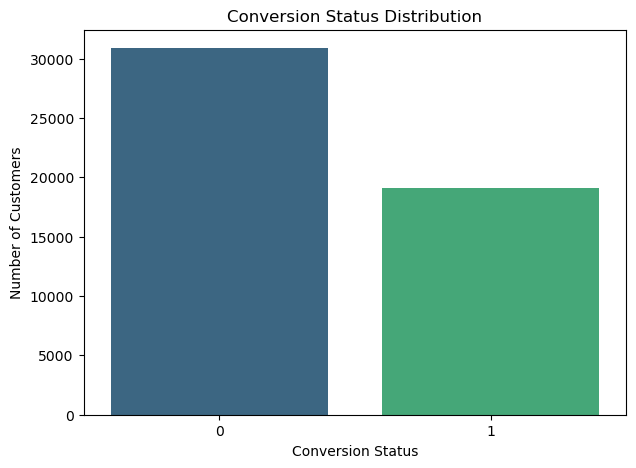

In [106]:
# 1A. Univariate Analysis - Target Variable 'Converted'

# Pandas: Value Counts and Percentage
conversion_counts = df['target'].value_counts()
conversion_percentages = df['target'].value_counts(normalize=True) * 100

print("--- Value Counts for 'Converted' ---")
print(conversion_counts)
print("\n--- Percentage of 'Converted' ---")
print(conversion_percentages)

# Seaborn/Matplotlib: Bar Plot for visualization
plt.figure(figsize=(7, 5))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Conversion Status Distribution')
plt.xlabel('Conversion Status')
plt.ylabel('Number of Customers')
# plt.savefig('converted_univariate_plot.png')
plt.show()

--- Descriptive Statistics for 'Income' ---
count   49976.00
mean        4.97
std         3.29
min         0.89
25%         2.04
50%         3.03
75%         9.11
max        10.12
Name: Income, dtype: float64


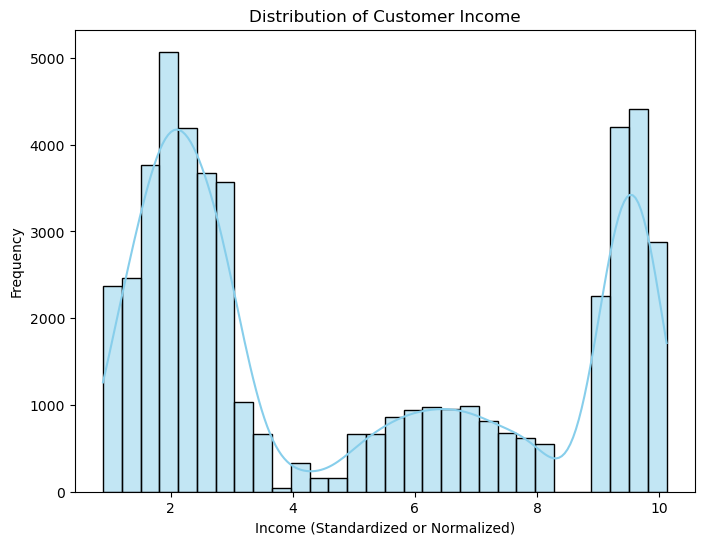

In [109]:
# 1B. Univariate Analysis - Continuous Variable 'Income'

# Pandas: Descriptive Statistics
print("--- Descriptive Statistics for 'Income' ---")
print(df['Income'].describe())

# Seaborn/Matplotlib: Histogram for visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Income')
plt.xlabel('Income (Standardized or Normalized)')
plt.ylabel('Frequency')
# plt.savefig('income_univariate_plot.png')
plt.show()

--- Value Counts for 'Rating' ---
Rating
Cold    23886
Warm    14771
Hot     11319
Name: count, dtype: int64

--- Percentage of 'Rating' ---
Rating
Cold   47.79
Warm   29.56
Hot    22.65
Name: proportion, dtype: float64


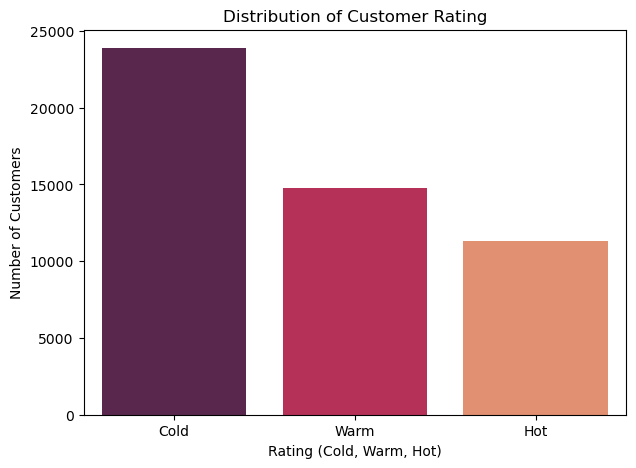

In [110]:
# 1C. Univariate Analysis - Categorical Variable 'Rating'

# Pandas: Value Counts and Percentage
rating_counts = df['Rating'].value_counts()
rating_percentages = df['Rating'].value_counts(normalize=True) * 100

print("--- Value Counts for 'Rating' ---")
print(rating_counts)
print("\n--- Percentage of 'Rating' ---")
print(rating_percentages)

# Seaborn/Matplotlib: Bar Plot for visualization
plt.figure(figsize=(7, 5))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Customer Rating')
plt.xlabel('Rating (Cold, Warm, Hot)')
plt.ylabel('Number of Customers')
# plt.savefig('rating_univariate_plot.png')
plt.show()

--- Conversion Percentage by Customer Rating ---
target     0     1
Rating            
Cold   62.46 37.54
Hot    60.40 39.60
Warm   61.88 38.12


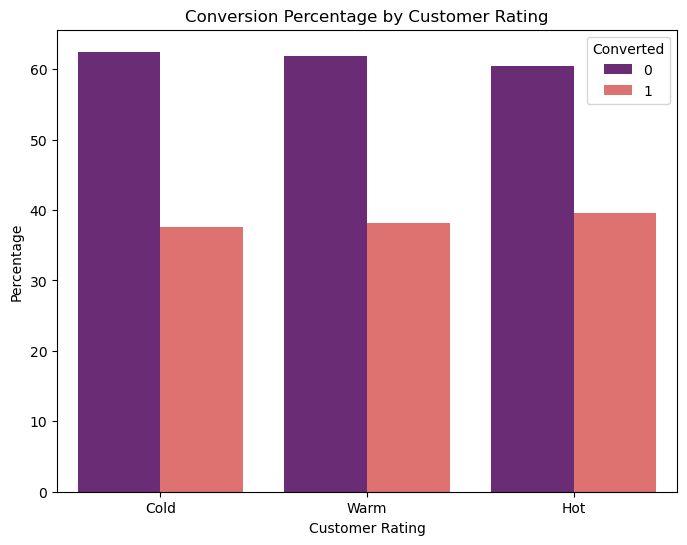

In [115]:
#Bivariate Analysis - Categorical vs. Target: Rating vs. Converted

conversion_rate_by_rating = pd.crosstab(df['Rating'], df['target'], normalize='index') * 100

print("--- Conversion Percentage by Customer Rating ---")
print(conversion_rate_by_rating)

# Seaborn/Matplotlib: Stacked Bar Chart for visualization
rating_conversion_df = df.groupby(['Rating', 'target']).size().reset_index(name='Count')
total_by_rating = rating_conversion_df.groupby('Rating')['Count'].transform('sum')
rating_conversion_df['Percentage'] = rating_conversion_df['Count'] / total_by_rating * 100

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Rating',
    y='Percentage',
    hue='target',
    data=rating_conversion_df,
    order=['Cold', 'Warm', 'Hot'], # Ensure order is logical
    palette='magma'
)
plt.title('Conversion Percentage by Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Percentage')
plt.legend(title='Converted')
# plt.savefig('rating_conversion_bivariate_plot.png')
plt.show()

--- Age Descriptive Statistics Grouped by Conversion Status ---
          count  mean   std   min   25%   50%   75%   max
target                                                   
0      30897.00 38.99 12.14 18.00 28.00 39.00 50.00 60.00
1      19079.00 38.96 12.10 18.00 29.00 39.00 49.00 60.00


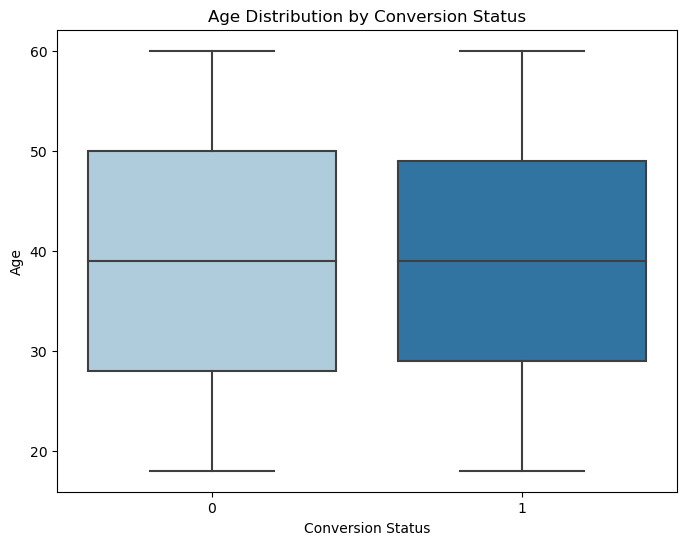

In [117]:
#  Bivariate Analysis - Continuous vs. Target: Age vs. Converted

# Pandas: Grouped Descriptive Statistics
print("--- Age Descriptive Statistics Grouped by Conversion Status ---")
print(df.groupby('target')['Age'].describe())

# Seaborn/Matplotlib: Box Plot for visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='Age', data=df, palette='Paired')
plt.title('Age Distribution by Conversion Status')
plt.xlabel('Conversion Status')
plt.ylabel('Age')
# plt.savefig('age_conversion_bivariate_plot.png')
plt.show()